<a href="https://colab.research.google.com/github/urosgodnov/Python-Programming-for-Business-Analytics/blob/main/Python_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming for Business Analytics - Basics of Python - IV

## Pandas

In [ ]:
import pandas as pd
import numpy as np

### Renaming, grouping and sorting

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32],
    'Salary': [50000, 60000, 55000, 70000],
    'Department': ['HR', 'IT', 'Finance', 'IT']
}

df = pd.DataFrame(data)

def case_statement(row):
    if row['Age'] < 25:
        return 'Young'
    elif 25 <= row['Age'] < 30:
        return 'Mid-age'
    else:
        return 'Experienced'

df['Experience Level'] = df.apply(case_statement, axis=1)
df['Annual Bonus'] = df['Salary'] * 0.1

In [ ]:
# renaming
renamed_df = df.rename(columns={'Name': 'Employee Name', 'Salary': 'Monthly Salary'})
renamed_df

In [ ]:
# Grouping by Department and Calculating Mean Salary
grouped_df = df.groupby('Department')['Salary'].mean().reset_index()
grouped_df

In [ ]:
# Sorting by Salary in Descending Order
sorted_df = df.sort_values(by='Salary', ascending=False)
sorted_df

In [ ]:
# Grouping by Multiple Columns and Calculating Multiple Aggregations
grouped_agg_df = df.groupby(['Department', 'Experience Level']).agg(
    Mean_Salary=('Salary', 'mean'),
    Total_Bonus=('Annual Bonus', 'sum'),
    Employee_Count=('Name', 'count')
).reset_index()
grouped_agg_df

In [ ]:
# Calculate Percentage Contribution of Each Employee's Salary to Their Department's Total Salary
# it broadcasts the sum of salaries for each department to all the employees belonging to that department
df['Department Total Salary'] = df.groupby('Department')['Salary'].transform('sum')
df['Salary Contribution %'] = (df['Salary'] / df['Department Total Salary']) * 100

df

### Tasks

In [ ]:
# New Sample DataFrame for demonstration
new_data = {
    'Product': ['Laptop', 'Tablet', 'Smartphone', 'Desktop', 'Smartwatch'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Wearables'],
    'Price': [1200, 300, 800, 1500, 200],
    'Units Sold': [100, 200, 150, 50, 300],
    'Rating': [4.5, 4.2, 4.7, 4.3, 4.8]
}

new_df = pd.DataFrame(new_data)

In [ ]:
# Grouping by Category and Calculating Total Revenue
# revenue should be calculated with units*price

In [ ]:
# Sorting by Revenue in Descending Order

In [ ]:
# Grouping by Rating Category and Calculating Multiple Aggregations
# Avg_Price, Total_Units_Sold, Product_Count
new_df['Rating Category'] = np.select(
    condlist=[
        new_df['Rating'] >= 4.5,
        (new_df['Rating'] >= 4.0) & (new_df['Rating'] < 4.5),
        new_df['Rating'] < 4.0
    ],
    choicelist=['Excellent', 'Good', 'Average'],
    default='Unknown'
)

In [ ]:
# Calculate Each Product's Contribution to Total Revenue

### Solutions

In [ ]:
new_df['Revenue'] = new_df['Price'] * new_df['Units Sold']  # Ensure 'Revenue' exists for this task
grouped_revenue_df = new_df.groupby('Category')['Revenue'].sum().reset_index()

grouped_revenue_df

In [ ]:
sorted_revenue_df = new_df.sort_values(by='Revenue', ascending=False)

sorted_revenue_df

In [ ]:
grouped_rating_df = new_df.groupby('Rating Category').agg(
    Avg_Price=('Price', 'mean'),
    Total_Units_Sold=('Units Sold', 'sum'),
    Product_Count=('Product', 'count')
).reset_index()

grouped_rating_df

In [ ]:
new_df['Total Revenue'] = new_df['Revenue'].sum()
new_df['Revenue Contribution %'] = (new_df['Revenue'] / new_df['Total Revenue']) * 100

new_df

### Handling missing data

In [ ]:
missing_data = {
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'Department': ['HR', 'IT', 'Finance', np.nan, 'IT', 'HR', np.nan, 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, None, 55000, 70000, 48000, None, None, 62000, 52000],
    'Join Date': ['2020-01-15', '2019-06-01', '2021-03-20', None, '2018-12-11', '2015-07-10', None, '2017-09-23', '2016-03-30', '2019-11-12'],
    'Performance Rating': [4.5, np.nan, 4.7, 4.3, None, 4.2, 4.6, np.nan, 4.1, None]
}

missing_df = pd.DataFrame(missing_data)
missing_df.head()

In [ ]:
# Checking for null values in the DataFrame
null_values_check = pd.isnull(missing_df)

null_values_check

In [ ]:
# Selecting rows where a specific column has null values
null_rows_salary = missing_df[missing_df['Salary'].isnull()]

null_rows_salary

In [ ]:
# Counting total null values per column
null_count = pd.isnull(missing_df).sum()

null_count

In [ ]:
# Dropping rows with any null values
dropped_na_rows = missing_df.dropna()

dropped_na_rows

In [ ]:
# Dropping columns with any null values
dropped_na_columns = missing_df.dropna(axis=1)

dropped_na_columns

In [ ]:
# Replacing missing values with a specified value (e.g., 0 for 'Salary')
filled_na_with_zero = missing_df.fillna({'Salary': 0})

filled_na_with_zero

In [ ]:
# Replacing missing values in a Series with its mean (example: 'Performance Rating')
missing_df['Performance Rating'] = missing_df['Performance Rating'].fillna(missing_df['Performance Rating'].mean())

missing_df

In [ ]:
# Advanced: Forward Fill Missing Values in Join Date
missing_df['Join Date'] = missing_df['Join Date'].fillna(method='ffill')

missing_df

In [ ]:
# Advanced: Backward Fill Missing Values in Department
missing_df['Department'] = missing_df['Department'].fillna(method='bfill')

missing_df

In [ ]:
# interpolate() function in pandas fills missing values in a column by estimating their values using a defined interpolation method.
# By default, it uses linear interpolation, which assumes a straight line between known data points to estimate the missing values.

missing_df['Salary'] = missing_df['Salary'].interpolate()
missing_df['Performance Rating'] = missing_df['Performance Rating'].interpolate()

missing_df

### Task

In [ ]:
# Task Instructions:
# 1. Replace missing values in the 'Department' column with "Unknown".
# 2. Replace missing values in the 'Salary' column with the average salary.
# 3. Replace missing values in the 'Join Date' column with "2020-01-01".
# 4. Replace missing values in the 'Performance Rating' column with the column's mean.
# 5. Rename the 'Performance Rating' column to 'Rating'.
# 6. Create a subset of rows where 'Salary' is greater than 55000 and only include 'Employee' and 'Salary'.
# 7. Group the data by 'Department' and calculate the average salary and count of employees.

data = {
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Department': ['HR', 'IT', 'Finance', 'IT', None],
    'Salary': [50000, 60000, 55000, None, 70000],
    'Join Date': ['2020-01-15', '2019-06-01', '2021-03-20', None, '2018-12-11'],
    'Performance Rating': [4.5, 4.2, 4.7, 4.3, None]
}

# Create the DataFrame
missing_df = pd.DataFrame(data)

missing_df

### Solution

In [ ]:
# 1. Replace missing values in the 'Department' column
missing_df['Department'] = missing_df['Department'].fillna('Unknown')

# 2. Replace missing values in the 'Salary' column
missing_df['Salary'] = missing_df['Salary'].fillna(missing_df['Salary'].mean())

# 3. Replace missing values in the 'Join Date' column
missing_df['Join Date'] = missing_df['Join Date'].fillna('2020-01-01')

# 4. Replace missing values in the 'Performance Rating' column
missing_df['Performance Rating'] = missing_df['Performance Rating'].fillna(missing_df['Performance Rating'].mean())

# 5. Rename the 'Performance Rating' column to 'Rating'
missing_df.rename(columns={'Performance Rating': 'Rating'}, inplace=True)

# 6. Create a subset of rows where 'Salary' is greater than 55000
salary_subset = missing_df.loc[missing_df['Salary'] > 55000, ['Employee', 'Salary']]

# 7. Group the data by 'Department'
grouped_data = missing_df.groupby('Department').agg(
    Avg_Salary=('Salary', 'mean'),
    Employee_Count=('Employee', 'count')
).reset_index()

### Datetime with pandas

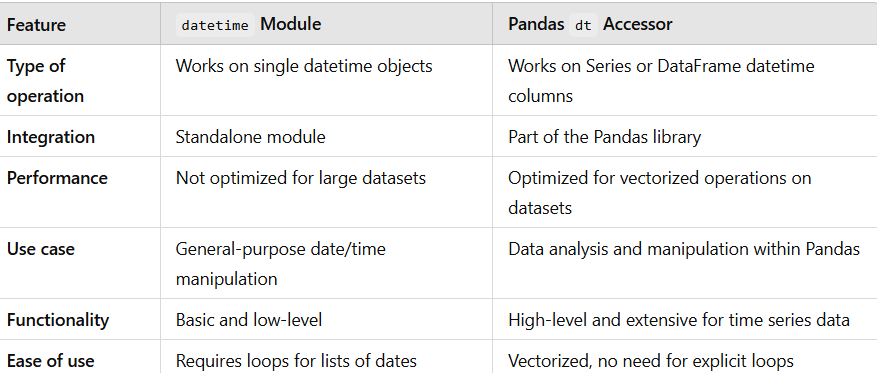

In [ ]:
import pandas as pd

# Your DataFrame
data = {
    'Full Name': ['Alice Smith', 'Bob Johnson', 'Charlie Brown', 'David Wilson', 'Eve Adams'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'Marketing'],
    'Start Date': ['2020-01-15', '2019-06-01', '2021-03-20', '2018-12-11', '2022-07-15'],
    'End Date': ['1/10/2022', '6/15/2023', '10/1/2022', '12/31/2021', '8/1/2023'],
    'Employee ID': ['E123', 'E456', 'E789', 'E012', 'E345'],
    'Email': ['alice.smith@company.com', 'bob.johnson@company.com', 'charlie.brown@company.com', 'david.wilson@company.com', 'eve.adams@company.com']
}

string_datetime_df = pd.DataFrame(data)

# Convert 'Start Date' to datetime
string_datetime_df['Start Date'] = pd.to_datetime(string_datetime_df['Start Date'])

# Access the dt accessor and list its methods
methods = [method for method in dir(string_datetime_df['Start Date'].dt) if not method.startswith('_')]
list(methods)

In [ ]:
# Parsing string to datetime
# pd.to_datetime() with errors='coerce' tries to understand each date. If it can, it puts the date on a calendar. If it can't,
# it throws the unreadable date into a separate "invalid" pile (NaT)
string_datetime_df['End Date'] = pd.to_datetime(string_datetime_df['End Date'], errors='coerce')

string_datetime_df

In [ ]:
# Extract year, month, and day from 'Start Date'
string_datetime_df['Start Year'] = string_datetime_df['Start Date'].dt.year
string_datetime_df['Start Month'] = string_datetime_df['Start Date'].dt.month
string_datetime_df['Start Day'] = string_datetime_df['Start Date'].dt.day

string_datetime_df

In [ ]:
# Add a column for the day of the week as a string
string_datetime_df['Day of Week'] = string_datetime_df['Start Date'].dt.day_name()

string_datetime_df


In [ ]:
# Calculate days since start
string_datetime_df['Days Since Start'] = (pd.Timestamp('today') - string_datetime_df['Start Date']).dt.days

string_datetime_df

In [ ]:
# Create a column indicating if 'Start Date' was on a weekend
# day of the week as integers (Monday=0, Sunday=6)

string_datetime_df['Started on Weekend'] = string_datetime_df['Start Date'].dt.dayofweek >= 5

string_datetime_df

In [ ]:
# Format 'Start Date' as 'Month-Year'
string_datetime_df['Start Month-Year'] = string_datetime_df['Start Date'].dt.strftime('%B-%Y')

string_datetime_df

In [ ]:
# Add a column for months since start
string_datetime_df['Months Since Start'] = ((pd.Timestamp('today').year - string_datetime_df['Start Date'].dt.year) * 12 +
                                            (pd.Timestamp('today').month - string_datetime_df['Start Date'].dt.month))

string_datetime_df

In [ ]:
# Calculate months between 'Start Date' and 'End Date' using a UDF
from dateutil.relativedelta import relativedelta
def calculate_months_between_dates(row):
    delta = relativedelta(row['End Date'], row['Start Date'])
    #print(vars(delta))
    return delta.years * 12 + delta.months

string_datetime_df['Months Between Start and End'] = string_datetime_df.apply(calculate_months_between_dates, axis=1)

string_datetime_df

In [ ]:
# Additional Example: Handling Time Intervals
time_data = {
    'Event': ['Login', 'Logout', 'Break', 'Meeting', 'Presentation'],
    'Timestamp': ['2023-09-21 08:15:00', '2023-09-21 10:45:00', '2023-09-21 11:05:00', '2023-09-21 14:20:00', '2023-09-21 16:50:00']
}

# Create a new DataFrame with datetime data
time_df = pd.DataFrame(time_data)
time_df['Timestamp'] = pd.to_datetime(time_df['Timestamp'])

time_df

In [ ]:
# Create a column for time intervals (2-hour bins)
# The hour // 2 performs integer division by 2, grouping hours into blocks of 2 (e.g., 0–1, 2–3, 4–5)
# Multiplying by 2 gives the start of the interval. For example:
# If hour = 13, then 13 // 2 = 6, and 6 * 2 = 12. So, interval_start = 12.
# The :02d ensures the hour is zero-padded to two digits (e.g., 08 instead of 8)

def assign_time_interval(timestamp):
    hour = timestamp.hour
    interval_start = (hour // 2) * 2  # Start of the interval
    interval_end = interval_start + 2  # End of the interval
    return f"{interval_start:02d}:00 - {interval_end:02d}:00"

time_df['Time Interval'] = time_df['Timestamp'].apply(assign_time_interval)

time_df

In [ ]:
# problems with different local settings, e.g. German month names
# changing locale on google colab is not straightforward
# MAC: en_US.UTF-8, de_DE.UTF-8; windows: deu


### Task

In [ ]:
# Load parquet file from nycTaxi for July, 2024
# Analyze which combination of days (weekday name) and hour intervals (by 2 hours)
# has the highest frequency

nyc_taxi_parquet = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-07.parquet')
nyc_taxi_parquet.head()

### Solution

In [ ]:
def assign_time_interval(timestamp):
    hour = timestamp.hour
    interval_start = (hour // 2) * 2  # Start of the interval
    interval_end = interval_start + 2  # End of the interval
    return f"{interval_start:02d}:00 - {interval_end:02d}:00"

nyc_taxi_parquet['time_interval'] = nyc_taxi_parquet['tpep_pickup_datetime'].apply(assign_time_interval)
nyc_taxi_parquet['weekday_name'] = nyc_taxi_parquet['tpep_pickup_datetime'].dt.day_name()

In [ ]:
nyc_taxi_parquet[["weekday_name","time_interval"]].head()

In [ ]:
nyc_taxi_parquet.groupby(["weekday_name","time_interval"]). \
size().reset_index(name="count").sort_values("count", ascending=False).head()

### String manipulation with pandas

In [ ]:
data = {
    'Full Name': ['Alice Smith', 'Bob Johnson', 'Charlie Brown', 'David Wilson', 'Eve Adams'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'Marketing'],
    'Start Date': ['2020-01-15', '2019-06-01', '2021-03-20', '2018-12-11', '2022-07-15'],
    'End Date': ['1/10/2022', '6/15/2023', '10/1/2022', '12/31/2021', '8/1/2023'],
    'Employee ID': ['E123', 'E456', 'E789', 'E012', 'E345'],
    'Email': ['alice.smith@company.com', 'bob.johnson@company.com', 'charlie.brown@company.com', 'david.wilson@company.com', 'eve.adams@company.com']
}

# Create the DataFrame
string_datetime_df = pd.DataFrame(data)

In [ ]:
# Split 'Full Name' into 'First Name' and 'Last Name'

string_datetime_df[['First Name', 'Last Name']] = string_datetime_df['Full Name'].str.split(' ', expand=True)

string_datetime_df

In [ ]:
data1 = {
    "Full Name": ["John Doe", "Jane A. Smith", "Bob Johnson"],
    "Age": [28, 34, 45],
}

df = pd.DataFrame(data1)

split_df = df["Full Name"].str.split(" ", expand=True)
print(split_df)

In [ ]:
# First name to upper, Lastname to lower
string_datetime_df['Upper First Name'] = string_datetime_df['First Name'].str.upper()
string_datetime_df['Lower Last Name'] = string_datetime_df['Last Name'].str.lower()

string_datetime_df

In [ ]:
# Extract domain names from 'Email'

string_datetime_df['Email Domain'] = string_datetime_df['Email'].str.split('@').str[1]

string_datetime_df

In [ ]:
# Check if 'Email' contains 'company.com'
string_datetime_df['Is Company Email'] = string_datetime_df['Email'].str.contains('company.com')

string_datetime_df

In [ ]:
# Extract numeric part of 'Employee ID'
# regular expressions
string_datetime_df['Employee Number'] = string_datetime_df['Employee ID'].str.extract('(\d+)')

string_datetime_df

In [ ]:
# Replace spaces in 'Full Name' with underscores
string_datetime_df['Full Name Underscore'] = string_datetime_df['Full Name'].str.replace(' ', '_', regex=False)

string_datetime_df

**Regular expressions (advanced)**

- String Accessor (.str):

In Pandas, string methods are accessed via the .str accessor on a Series or column.

- Regex Parameter:

Many string methods (e.g., .replace, .contains, .split, .extract) accept a regex=True/False parameter (often defaulting to True).

- Common Methods:

  - str.contains(): Check if a pattern is contained within each string.
  - str.replace(): Replace substrings that match a pattern.
  - str.split(): Split each string by a pattern.
  - str.extract() / str.extractall(): Capture groups from each string using a regex.
  - str.match(), str.fullmatch(), str.findall(): Various ways to match or find patterns.

- Capture Groups:

Parentheses ( ... ) define capture groups in your regex. str.extract() returns these groups as new columns.

- Flags:

You can pass regex flags like re.IGNORECASE (or re.I) by specifying the flags= parameter, making your search case-insensitive, etc.

- Performance:

Regex can be slower with very large Series. For performance-critical tasks, try to optimize or avoid overly complex patterns.


In [ ]:
import re

df = pd.DataFrame({
    "text": [
        "Hello World!",
        "Email me at example123@test.com",
        "Numbers: 12345, 6789, and 42.",
        "No digits here",
        "MixedCaseString",
        "Line with 2    spaces",
        "Another line with tabs\tand spaces",
        "The price is $49.99",
        "Visit https://docs.python.org",
        None  # Missing value
    ]
})

df

In [ ]:
# Pattern: Any sequence of digits (\d+)
df["has_digits"] = df["text"].str.contains(r"\d+", regex=True)

df

In [ ]:
# Pattern: The string should start with "Hello"
df["starts_with_hello"] = df["text"].str.match(r"^Hello")

df

In [ ]:
# Pattern: Only digits for the entire string
df["entirely_digits"] = df["text"].str.fullmatch(r"\d+")

df

In [ ]:
# Pattern: Remove all digits
df["no_digits"] = df["text"].str.replace(r"\d+", "", regex=True)

df

In [ ]:
# Split on any sequence of whitespace
split_df = df["text"].str.split(r"\s+", expand=True)

split_df

In [ ]:
# Pattern: all digit sequences
df["all_numbers"] = df["text"].str.findall(r"\d+")

df

In [ ]:
# Pattern: All digit groups, capturing each sequence
extracted = df["text"].str.extractall(r"(\d+)")

extracted

In [ ]:
# Pattern: Count how many digits in each string
df["digit_count"] = df["text"].str.count(r"\d")

df

In [ ]:
df["contains_hello_case_insensitive"] = df["text"].str.contains(
    r"hello",
    flags=re.IGNORECASE,
    regex=True
)

df

In [ ]:
# Check if string ends with ".org" using a regex pattern with contains
df["ends_with_org"] = df["text"].str.contains(r"\.org$", regex=True)

df

### Task

In [ ]:
# Step 1: Create a sample DataFrame
df = pd.DataFrame({
    "full_name": [
        "John Doe",
        "Jane A. Smith",
        "   Bob  Johnson   ",  # extra spaces
        "Maria  de la Cruz",
        "Tricky   Name   Test"
    ],
    "email": [
        "john.doe@example.com",
        "jane.smith@@some-domain.org",  # double '@'
        "bob.johnson@mail.com",
        "maria_cruz@example.es",
        None  # missing email
    ],
    "phone": [
        "+1(555)123-4567",
        "555-abc-7890",
        "(123) 456 7890 ext. 12",
        "5551234567",
        "???"
    ],
    "message": [
        "OrderID: #12345. Looking for new shoes.",
        "Hello, I'm interested in the summer sale. Order #6789.",
        "Need a refund on order #42. Product code: X-123-XY.",
        "Hola, about my last order #00123 and code: Y-99.",
        "No order here. Product code: Z-999-XX. Another code: A-1234-BB. #44444"
    ]
})

df

# Remove leading/trailing spaces and collapse multiple spaces into a single space. (str.strip())
# Split the cleaned name into up to three parts:
# - first_name
# - middle_name (optional)
# - last_name (if there are more than two parts, lump everything after the second split into last_name)
# Normalize phone Numbers:
#  - Extract a clean numeric version of the phone number in phone_clean (e.g., "15551234567").
#  - Remove parentheses, dashes, letters, spaces, etc. Possibly keep a leading + if relevant.
#  - Mark numbers that have fewer than 10 digits (after cleaning) as invalid in a new column phone_valid (ge).
# Extract Order IDs & Product Codes from message:
#  - Order IDs appear as #12345, #42, #00123, etc. Extract all occurrences from each message. Store them in a list in a column named order_ids.
#  - You can use df["message"].str.findall(...) with a pattern like r"#(\d+)".

### Solution

In [ ]:
# 1) Remove leading/trailing spaces
df["full_name_clean"] = df["full_name"].str.strip()

# 2) Collapse multiple spaces to one
df["full_name_clean"] = df["full_name_clean"].str.replace(r"\s+", " ", regex=True)

# 3) Split into up to three parts
names_split = df["full_name_clean"].str.split(" ", n=2, expand=True)
df["first_name"] = names_split[0]
df["middle_name"] = names_split[1]
df["last_name"] = names_split[2]

# Keep digits and optionally a leading '+'
df["phone_clean"] = df["phone"].str.replace(r"[^\d+]", "", regex=True)

# Check length (e.g., must be >= 10 digits)
df["phone_valid"] = df["phone_clean"].str.len().ge(10)

# Order IDs
df["order_ids"] = df["message"].str.findall(r"#(\d+)")

# Product Codes (simple pattern)
df["product_codes"] = df["message"].str.findall(r"[A-Za-z]-\d+-[A-Za-z]+")

## Advanced pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Setting up a DataFrame for examples
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Year': [2021, 2021, 2022, 2022, 2021, 2022],
    'Sales': [200, 150, 300, 400, 250, 350],
    'Profit': [50, 30, 80, 100, 60, 90]
}
df = pd.DataFrame(data)

In [ ]:
#### Multi-Indexing
# Multi-indexing allows hierarchical indexing, which is useful for working with multi-dimensional data.
# This helps organize data with multiple levels of categorization for easier access and manipulation.

multi_index_df = df.set_index(['Region', 'Product'])
multi_index_df

In [ ]:
multi_index_df.loc[('North', 'A')]

In [ ]:
# Pivot Tables
# Pivot tables provide a way to aggregate data and display it in a summary form.
# They are particularly useful for analyzing and comparing data across multiple dimensions.

pivot_table = df.pivot_table(index='Region', columns='Product', values='Sales', aggfunc='sum')
pivot_table

In [ ]:
# Custom aggregations enable tailored summary statistics for data analysis.
# This is useful for deriving specific insights like total sales or average profit.

custom_agg = df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Average_Profit=('Profit', 'mean')
)
custom_agg

In [ ]:
#### Melt and Pivot
# `melt` and `pivot` reshape data between wide and long formats.
# These operations are useful for reformatting data to suit different types of analyses.
melted_df = df.melt(id_vars=['Region', 'Product'], value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Value')
melted_df



In [ ]:
# Pivoting data
pivoted_df = melted_df.pivot(index=['Region', 'Product'], columns='Metric', values='Value').reset_index()
pivoted_df

In [ ]:
#### Separating Rows
# Separating rows based on a delimiter in a column allows for handling data stored in a compact form.
# This is useful for scenarios like processing multi-valued attributes.

split_data = {
    'ID': [1, 2, 3],
    'Tags': ['tag1,tag2', 'tag3', 'tag4,tag5,tag6']
}
split_df = pd.DataFrame(split_data)

split_df

### Tasks

In [ ]:
##### Task 1: Calculate Total Profit for Each Year

In [ ]:
##### Task 2: Find the Product with the Highest Sales in Each Region
## This task shows how to identify the best-performing product in each region,
##  which is a common need in sales and marketing analyses.
## idxmax(): The idxmax function in pandas is used to find the index (or position) of the first
# occurrence of the maximum value in a Series or DataFrame along a specified axis.

In [ ]:
##### Task 3: Create a New Column Showing Profit Margin (Profit as Percentage of Sales)
## This task highlights deriving new metrics from existing columns,
## which is essential for financial analysis and business intelligence.


In [ ]:
# split_df['Tags'].str.split(','):
# This operation splits the string in the Tags column at each comma (,) and converts
# the resulting parts into a list.
# Example: 'tag1,tag2' becomes ['tag1', 'tag2'].
# .explode('Tags'):
# The explode method takes each list in the Tags column and creates a separate
# row for each element of the list.
# Example: A row with ['tag1', 'tag2'] will be expanded into two rows, one with tag1 and another with tag2.
split_df = split_df.assign(Tags=split_df['Tags'].str.split(',')).explode('Tags').reset_index(drop=True)
split_df

### Solutions

In [ ]:
yearly_profit = df.groupby('Year')['Profit'].sum()
yearly_profit

In [ ]:
highest_sales_product = df.loc[df.groupby('Region')['Sales'].idxmax()]
highest_sales_product[['Region', 'Product', 'Sales']]

In [ ]:
profit_margin_df = df.copy()
profit_margin_df['Profit_Margin'] = (profit_margin_df['Profit'] / profit_margin_df['Sales']) * 100
profit_margin_df

## Tests of linear dependency

In [ ]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [ ]:
#### Correlation Matrix
## A correlation matrix is useful for identifying relationships between numeric variables.
## It helps understand how strongly variables are related.

correlation_matrix = df[['Sales', 'Profit']].corr()
correlation_matrix

In [ ]:
#### Chi-Square Test
## The chi-square test is used to assess the independence between categorical variables.

chi2_data = pd.DataFrame({
    'Feature_A': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Feature_B': ['High', 'High', 'Low', 'Low', 'High']
})

# Creating a contingency table
contingency_table = pd.crosstab(chi2_data['Feature_A'], chi2_data['Feature_B'])

contingency_table

In [ ]:
# Performing chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

In [ ]:
### Linear Regression
### Linear regression models the relationship between a dependent variable and one or more independent variables.
##### Using `statsmodels`
### `statsmodels` provides detailed output for linear regression
## analysis, including coefficients, p-values, and R-squared values.

regression_df = pd.DataFrame({
    'Sales': [200, 150, 300, 400, 250, 350],
    'Profit': [50, 30, 80, 100, 60, 90]
})

regression_df

In [ ]:
# Preparing data
X = regression_df['Sales']
y = regression_df['Profit']

# Adding a constant to the independent variable
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Displaying the summary of the regression
model.summary()